In [1]:
import pandas as pd

applications = pd.read_csv("C:/Users/User/Downloads/applications.csv")
applications.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Male,Public services / Government,Single,3.0,"Higher Degree (bachelor's, specialist's, maste...",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,4.0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Female,Telecom,Single,0.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Female,Automotive,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3


In [163]:
#1 Încarcă tabelul din fișierul applications.csv într-un DataFrame Pandas pe laptop și curăță datele:
   #Elimină duplicatele din coloana applicant_id;
   #În câmpul External Rating, completează valorile lipsă cu zero
   #În câmpul Education level, completează valorile lipsă cu textul "Average".

applications = applications.drop_duplicates(subset=['applicant_id'])
applications['External Rating'] = applications['External Rating'].fillna(0)
applications['Education level'] = applications['Education level'].fillna('Average')
applications.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Male,Blockchain,Other,0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Male,Public services / Government,Single,0,"Higher Degree (bachelor's, specialist's, maste...",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Female,Telecom,Single,0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Female,Automotive,Single,0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3


In [27]:
#2 Adaugă datele din fișierul industries.csv în acest DataFrame, respectiv, evaluările industriilor.

industries = pd.read_csv("C:/Users/User/Downloads/industries.csv")
app_ind = pd.merge(applications, industries, on='Industry', how='left')
app_ind.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:37,12000.0,29,Male,Blockchain,Other,0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:26:39,NaN,36,Male,Public services / Government,Single,0,"Higher Degree (bachelor's, specialist's, maste...",NaN,63dfcf8e6904186650d6814279fbe42f,20
2,11.30.2022 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498,10
3,11.30.2022 10:27:31,1500.0,23,Female,Telecom,Single,0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1,15
4,11.30.2022 10:27:34,8400.0,33,Female,Automotive,Single,0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3,15


In [157]:
#3 Calculează evaluarea cererii conform următoarelor condiții:
   #Evaluarea trebuie să fie un număr între 0 și 100;
   #Evaluarea este suma scorurilor pentru cele 6 criterii;
   #Evaluarea este zero dacă nu există valoarea Amount sau dacă External Rating este zero.

import numpy as np

app_ind['Applied at'] = pd.to_datetime(app_ind['Applied at'], errors='coerce')
app_ind['Applied on day'] = app_ind['Applied at'].dt.day_name()
app_ind
app_ind['Age']= app_ind['Age'].astype(int)
day = ~app_ind['Applied on day'].isin(['Saturday', 'Sunday'])*10
age = ((app_ind['Age'] >= 35) & (app_ind['Age'] <= 55)) * 20
marital = (app_ind['Marital status'] == 'Married') * 20
location = (app_ind['Location'] == 'Kyiv') * 10
industry = app_ind['Score']
positive_rating = (app_ind['External Rating'] >= 7) * 20
negative_rating = (app_ind['External Rating'] <= 2) * -20
app_ind['Evaluation'] = day + age + marital + location + industry + positive_rating + negative_rating

#4 În tabelul rezultat, lasă doar cererile cu o evaluare mai mare decât zero, aceste cereri vor fi considerate acceptate.

accepted_applications = app_ind[app_ind['Evaluation'] > 0]
accepted_applications.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation,Applied on day,Final score,Week
1,2022-11-30 10:26:39,NaN,36,Male,Public services / Government,Single,0,"Higher Degree (bachelor's, specialist's, maste...",NaN,63dfcf8e6904186650d6814279fbe42f,20,30,Wednesday,30,48
3,2022-11-30 10:27:31,1500.0,23,Female,Telecom,Single,0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1,15,5,Wednesday,5,48
4,2022-11-30 10:27:34,8400.0,33,Female,Automotive,Single,0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3,15,5,Wednesday,5,48
5,2022-11-30 10:27:38,16500.0,31,Male,E-commerce,Single,0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",f720bf9c5c4c3e10a8568c1699847696,15,5,Wednesday,5,48
6,2022-11-30 10:27:42,4200.0,30,Male,Media,Married,0,"Higher Degree (bachelor's, specialist's, maste...","Lithuania, Vilnius",0aaf59fb3ef90f50ccd4800312e5c271,5,15,Wednesday,15,48


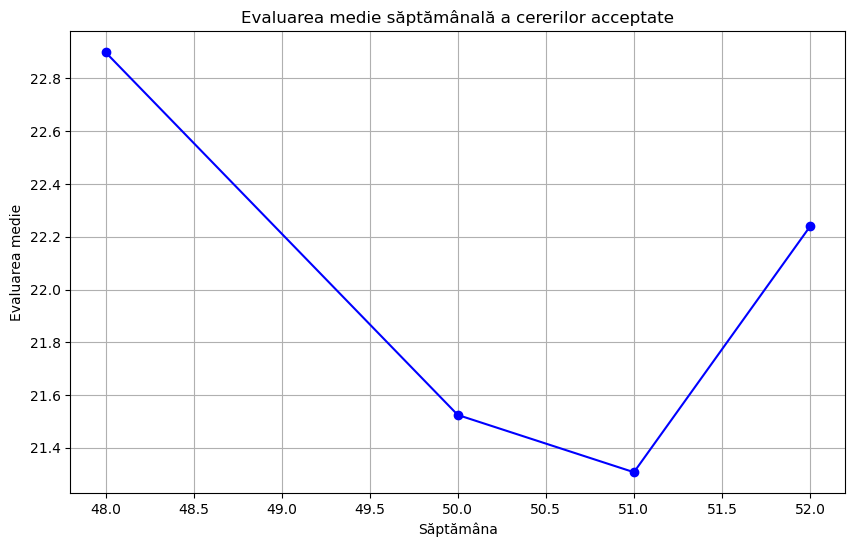

In [161]:
#5 Grupează datele din tabelul rezultat în funcție de săptămâna depunerii cererii și
  #afișează evaluarea medie a cererilor acceptate în fiecare săptămână pe grafic.

app_ind['Applied at'] = pd.to_datetime(app_ind['Applied at'])
app_ind['Week'] = app_ind['Applied at'].dt.isocalendar().week
accepted_applications = app_ind[app_ind['Evaluation'] > 0]
weekly_avg_evaluation = accepted_applications.groupby('Week')['Evaluation'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(weekly_avg_evaluation['Week'], weekly_avg_evaluation['Evaluation'], marker='o', linestyle='-', color='b')
plt.title('Evaluarea medie săptămânală a cererilor acceptate')
plt.xlabel('Săptămâna')
plt.ylabel('Evaluarea medie')
plt.grid()
plt.show()